In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [26]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [15]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28, 28, 1)))
# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1384576   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
import numpy as np
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)


Epoch 1/5
1500/1500 [==============================] - 27s 18ms/step - loss: 1.0039 - accuracy: 0.8475 - val_loss: 0.3402 - val_accuracy: 0.8820
Epoch 2/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2901 - accuracy: 0.8966 - val_loss: 0.3116 - val_accuracy: 0.8919
Epoch 3/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2498 - accuracy: 0.9097 - val_loss: 0.3299 - val_accuracy: 0.8879
Epoch 4/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2236 - accuracy: 0.9180 - val_loss: 0.3572 - val_accuracy: 0.8860
Epoch 5/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2030 - accuracy: 0.9241 - val_loss: 0.3333 - val_accuracy: 0.8947


In [19]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3466 - accuracy: 0.8915


In [23]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']


list

In [21]:
# index = int(input("Enter the index of the thing u want to print"))
predictions = model.predict(test_x[:3])

1/1 [==============================] - 0s 77ms/step


Prediction for image 1:
Label: ankle_boots, Confidence: 100.00%


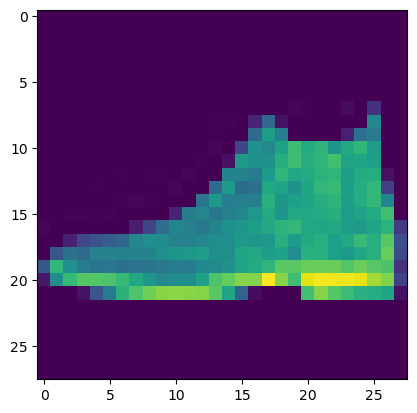

Prediction for image 2:
Label: pullover, Confidence: 100.00%


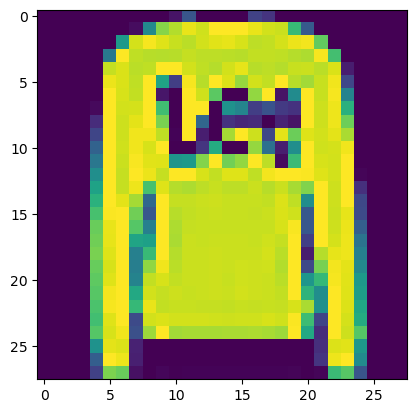

Prediction for image 3:
Label: trouser, Confidence: 100.00%


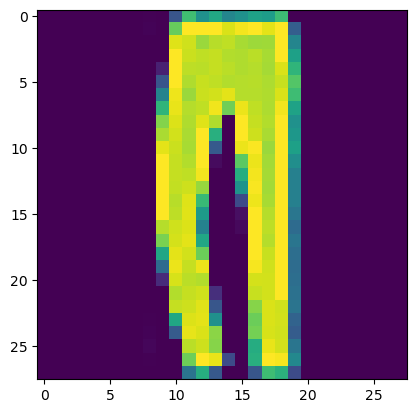

In [27]:
import matplotlib.pyplot as plt

for i, prediction in enumerate(predictions):
    label_index = np.argmax(prediction)
    label = labels[label_index]
    confidence_score = prediction[label_index]
    print("Prediction for image {}:".format(i+1))
    print("Label: {}, Confidence: {:.2f}%".format(label, confidence_score * 100))

    plt.imshow(test_x[:3][i])
    plt.show()